## 数値微分の例

$$ y = 0.01x^2 + 0.1x $$

上記の式のPythonでの実装と微分。

0.1999999999990898


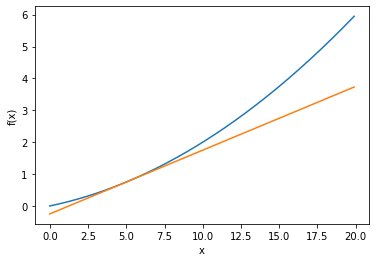

In [6]:

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 勾配(Gradient)

$$ f(x_0, x_1) = x_{0}^2 + x_{1}^2$$

上記の式の勾配の実装

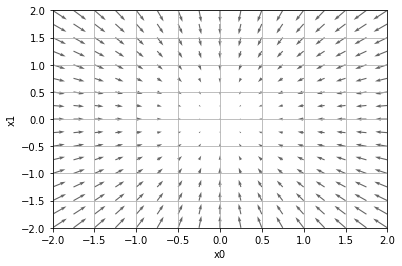

In [7]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

## 勾配法(1)
- 学習率(lr): 0.1
- Step: 20

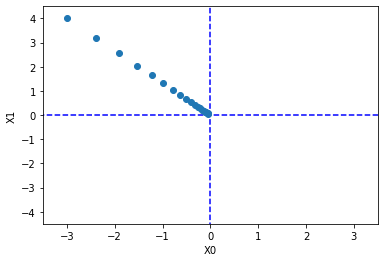

array([-0.04323456,  0.05764608])

In [23]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
# from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()
x_history [-1]

## 勾配法(2)
- 学習率(lr): 0.01
- Step: 100

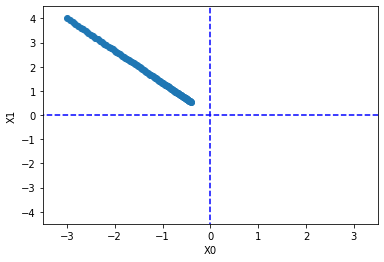

array([-0.40597823,  0.54130431])

In [29]:
init_x = np.array([-3.0, 4.0])    

lr = 0.01
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()
x_history [-1]

## ニューラルネットワークに対する勾配

入力：２　出力：３の場合の、重みWと損失関数Lとの関係

$$W =
\begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
\end{pmatrix}$$

$$\frac{∂L}{∂W} =
\begin{pmatrix}
\frac{∂L}{∂w_{11}} & \frac{∂L}{∂w_{12}} & \frac{∂L}{∂w_{13}} \\
\frac{∂L}{∂w_{21}} & \frac{∂L}{∂w_{22}} & \frac{∂L}{∂w_{23}} \\
\end{pmatrix}$$

In [33]:
# coding: utf-8
import sys, os
sys.path.append('/Users/seijisuzuki/python/pub/AI/E_license/deep-learning-from-scratch-master')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.44504052  0.14208394 -0.58712446]
 [ 0.66756078  0.21312591 -0.88068668]]


## 学習アルゴリズの実装

1. ステップ1(ミニバッチ)
調練データの中からランダムに一部のデータを選び出す。その選ばれたデータをミニバッチと言い、ここでは、そのミニバッチの損失関数の値を減らすことを目的とする。


2. ステップ2(勾配の算出)
ミニバッチの損失関数を減らすために、各重みパラメータの勾配を求める。勾配は、損失関数の値を最も減らす方向を示す。


3. ステップ 3(パラメータの更新)
重みパラメータを勾配方向に微小量だけ更新する。


4. ステップ4(繰り返す)
ステップ 1、ステップ2、ステップ3を繰り返す。

## TwoLayerNet クラスで使用する変数

### params
ニューラルネットワークのパラメータを保持するディクショナリ変数(インスタンス変数)。

- params['W1']は1層目の重み、params['b1'] は1層目のバイアス。
- params['W2']は2層目の重み、params['b2'] は2層目のバイアス。

### grads
勾配を保持するディクショナリ変数(numerical-gradient()メソッド!の返り値)。
 
- grads['W1']は1層目の重みの勾配、grads['b1']は1層目のバイアスの勾配。
- grads['W2']は2層目の重みの勾配、grads['b2']は2層目のパイアスの勾配。


## TwoLayerNet クラスのメソッド

### __init__(self, input_size,hidden_size, output_size)
初期化を行う。引数は頭から順に、入力層のニューロンの数、隠れ層のニューロンの数、出力層のニューロンの数。

### predict(self, x)
認識(推論)を行う。引数のxは画像データ。

### loss(self, x, t)
損失関数の値を求める。引数の x は画像データ、t は正解ラベル(以下の3つのメソッドの引数についても同様)。

### accuracy(self, x, t)
認識精度を求める。

### umerical_gradient(self, x, t)
重みパラメータに対する勾配を求める。

### gradient (self, x, t)
重みパラメータに対する勾配を求める。numerical_gradient()の高速版!




In [ ]:
# coding: utf-8
import sys, os
sys.path.append('/Users/seijisuzuki/python/pub/AI/E_license/deep-learning-from-scratch-master/ch04')  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

## ミニバッチ学習の実装

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.7895166666666666, 0.7962
train acc, test acc | 0.8767666666666667, 0.8815
train acc, test acc | 0.8996166666666666, 0.9023
train acc, test acc | 0.9082, 0.9111
train acc, test acc | 0.9158833333333334, 0.9188
train acc, test acc | 0.9208333333333333, 0.9235
train acc, test acc | 0.9253833333333333, 0.9264
train acc, test acc | 0.92875, 0.9298
train acc, test acc | 0.9316166666666666, 0.9332
train acc, test acc | 0.9345166666666667, 0.936
train acc, test acc | 0.9374666666666667, 0.937
train acc, test acc | 0.9398333333333333, 0.9392
train acc, test acc | 0.9421, 0.9404
train acc, test acc | 0.9443, 0.9436
train acc, test acc | 0.9460

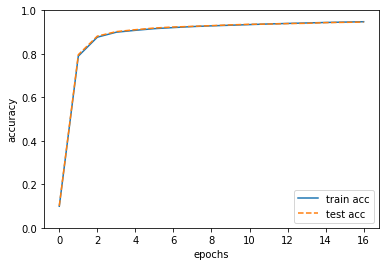

In [36]:
# coding: utf-8
import sys, os
sys.path.append('/Users/seijisuzuki/python/pub/AI/E_license/deep-learning-from-scratch-master/ch04')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# ハイパーパラメータ
iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 学習経過の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

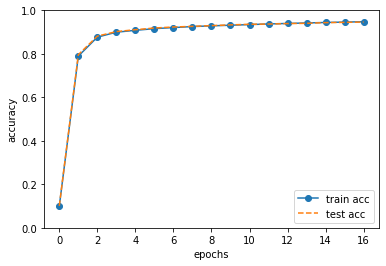

In [48]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc', linestyle='solid', marker='o')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 誤差逆伝播法

In [51]:
# coding: utf-8
import sys, os
sys.path.append('/Users/seijisuzuki/python/pub/AI/E_license/deep-learning-from-scratch-master/ch05')  
from layer_naive import *


apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200
